# Exercise: Dataset Basics

In the previous exercise we loaded some data and fit a model to it. Several aspects of this were simplified - particularly that the data was hard-coded into our python script, and we didn't spend any time really looking at the data itself.

Here we will walk through how to load data from file, filter it, and graph it. Doing so is a very important first step in order to build proper models, or to understand their limitations.

As normal, in the examples below, there is no need to edit any code. Try to read it, understand it, then press the run button to run it. As always, it is vitally important that these code blocks are run in the correct order, and nothing is missed.

## Loading data with Pandas

There are large variety of libraries that help you work with data. In Python, one of the most common is _Pandas_. We used pandas briefly in the previous exercise. Pandas can open data saved as text files and stores them in an organised table called a `dataframe`.

Let's open some text data that is stored on disk. Our data is saved in a file called `seattleWeather_1948-2017.csv`.

In [1]:
import pandas

# Read the text file containing data using pandas
dataset = pandas.read_csv('Data/seattleWeather_1948-2017.csv', parse_dates=['date'])

# Print the data
# Because there are a lot of data, this will only print the first and end rows
dataset

,date,amount_of_precipitation,max_temperature,min_temperature,rain
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True
...,...,...,...,...,...
25546,2017-12-10,0.00,49,34,False
25547,2017-12-11,0.00,49,29,False
25548,2017-12-12,0.00,46,32,False
25549,2017-12-13,0.00,48,34,False


As you can see, this dataset seems to contain information about temperatures and precipitation collected over several decades.

Data are stored as columns and rows, similar to a table you might see in Excel.

## Filtering data by Columns

Data are easy to filter by columns. We can either type this directly, like `dataset.my_column_name`, or like so: `dataset["my_column_name"]`.

We can use this to either extract data, or to delete data.

Lets take a look at the minimum temperatures, and delete the `precipitation` and `rain` columns. 

In [2]:

# Look at the minumum temperatures
print("Minimum temperatures")
print(dataset.min_temperature)

# Remove the rain and precipitation columns.
del dataset["amount_of_precipitation"]
del dataset["rain"]

# Print the column names
print("\nAvailable columns after deleting precipitation and rain information:")
print(dataset.columns.values)


Minimum temperatures
0        42
1        36
2        35
3        34
4        32
         ..
25546    34
25547    29
25548    32
25549    34
25550    36
Name: min_temperature, Length: 25551, dtype: int64

Available columns after deleting precipitation and rain information:
['date' 'max_temperature' 'min_temperature']



## Filtering data by Rows

We can get data from the top of the table by using the `head()` function, or from the bottom of the table by using the `tail()` function. 

Both functions essentially copy a section of our dataframe. Here we sending these copies to the `print()` function, but these copies can also be used for other purposes, such as for use in analyses or graphs.

In [3]:
# Print the data at the top of the table
print("TOP OF TABLE")
print(dataset.head())

# print the data at the bottom of the table
print("\nBOTTOM OF TABLE")
print(dataset.tail())

TOP OF TABLE
        date  max_temperature  min_temperature
0 1948-01-01               51               42
1 1948-01-02               45               36
2 1948-01-03               45               35
3 1948-01-04               45               34
4 1948-01-05               45               32

BOTTOM OF TABLE
            date  max_temperature  min_temperature
25546 2017-12-10               49               34
25547 2017-12-11               49               29
25548 2017-12-12               46               32
25549 2017-12-13               48               34
25550 2017-12-14               50               36


We now can see we have data between 1948 and 2017.

We can also filter logically. For example, we can look at data where the temperature was less than 40 degrees (F).

This works by calculating a `True` or `False` value for each row, then keeping only those rows where the value is `True`.

In [4]:
# Print how many days of data we have
print(f"We have {len(dataset)} days of data total")

# Determine whether each day was below 40 F
# This creates a True or False value for each row where True means 
# the daily low temperature was below 40F.
was_a_cold_day = dataset.min_temperature < 40
print("\nWhether the day (row) was below 40 degrees F:")
print(was_a_cold_day)

# Now apply this 'mask' to our data to keep only days that were below 40F
data_from_cold_days = dataset[was_a_cold_day]
print("\nDays where the temperature dropped below 40 degrees F:")
print(data_from_cold_days)

# Print the number of cold days
print(f"\nnumber of days that are below 40 degrees: {len(data_from_cold_days)}")

We have 25551 days of data total

Whether the day (row) was below 40 degrees F:
0        False
1         True
2         True
3         True
4         True
         ...  
25546     True
25547     True
25548     True
25549     True
25550     True
Name: min_temperature, Length: 25551, dtype: bool

Days where the temperature dropped below 40 degrees F:
            date  max_temperature  min_temperature
1     1948-01-02               45               36
2     1948-01-03               45               35
3     1948-01-04               45               34
4     1948-01-05               45               32
5     1948-01-06               48               39
...          ...              ...              ...
25546 2017-12-10               49               34
25547 2017-12-11               49               29
25548 2017-12-12               46               32
25549 2017-12-13               48               34
25550 2017-12-14               50               36

[7575 rows x 3 columns]

number of d

This looks like a lot of code, but we can compress it into a single line.

Let's do something similar - restrict our data to everything before the year 1952. 

In [5]:
from datetime import datetime

# Make a copy of the dataset that only contains dates before 1952
# The call to copy() is optional but can help avoid unexpected
# behaviour in more complex scenarios
data_pre1952 = dataset[dataset.date < datetime(1952,1,1)].copy()


# Print information about this
print(f"We now have {len(data_pre1952)} rows in our dataset. The last few rows are:")
data_pre1952.tail()

We now have 1461 rows in our dataset. The last few rows are:


,date,max_temperature,min_temperature
1456,1951-12-27,40,31
1457,1951-12-28,42,32
1458,1951-12-29,40,32
1459,1951-12-30,33,22
1460,1951-12-31,25,16


## Graphing Data

Graphing data is often the easiest way to understand it. Graphing can require many lines of code, because many options are available.

When getting started, usually the best way is to find an example and modify it to meet your needs.

Lets make a simple graph of minumum daily temperatures, arranged by date. 

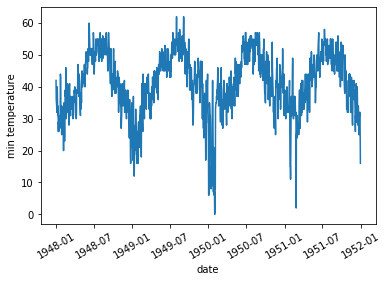

In [6]:
# Load matplotlib to create our graphs
import matplotlib.pyplot as graph
import pandas.plotting
pandas.plotting.register_matplotlib_converters()

# Show a graph of min temperature by date:
# -- This first line is a special command that lets this work in Jupyter Notebooks
%matplotlib inline
# -- Create a time series graph
graph.plot(data_pre1952.date, data_pre1952.min_temperature)
# -- Add some labels
graph.ylabel('min temperature')
graph.xlabel("date")
# -- Rotate the text on the x axis
graph.xticks(rotation=30)
# -- Show
graph.show()

## Creating New Columns

The graph above shows temperature changing over time, but what if we want to overlap the years on top of one another?

To do this, we will need to create a new column - the day of the year - and put that on the X axis instead (For example, Jan 1 becomes 1, and 31 Dec becomes 365).

Creating new columns uses very similar syntax to what we've seen before.

Below, we will use a built-in function to convert dates into day-of-the-year, and graph the result

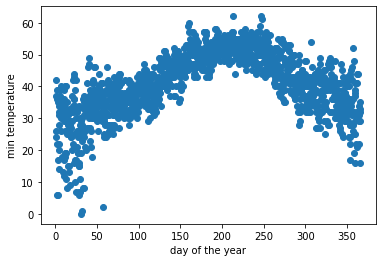

In [7]:
# Convert dates into the day of the year
# and save to a new column called day_of_year
data_pre1952['day_of_year'] = data_pre1952.date.dt.dayofyear

# Show a graph of min temperature by day of the year:
# -- Create a scatterplot
graph.scatter(data_pre1952.day_of_year, data_pre1952.min_temperature)
# -- Add some labels
graph.ylabel('min temperature')
graph.xlabel("day of the year")
# -- Show
graph.show()

We can now see that the coldest days of the year for Seattle are in usually in January, the mildest are around the 200th day of the year (mid-late July).


## Summary

We've covered the basics of working with data in Python. This has included:
* Opening tablated data from a file into a dataframe (table)
* Inspecting the top and bottom of the dataframe
* Adding and removing columns of data
* Removing rows of data based on criteria
* Graphing data to understand trends

Learning to work with dataframes can feel tedious or dry, but keep going because these basic skills are critical to unlocking exciting machine learning techniques that we will cover in later modules.